In [1]:
# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/drive/My Drive/Dataset/Automobile.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)

# Sekarang df adalah dataframe yang berisi data dari dataset
# Anda dapat melakukan operasi dan analisis data lebih lanjut dengan dataframe ini

In [4]:
print(df)
df.columns

                          name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  origin  
0      3504          12.0  

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [5]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={
    "model_year": "Year_model",
    "name": "Name"
})


# Menghapus kolom "CustomerID" dan "Gender" dari dataframe
df = df.drop(columns=["acceleration", "displacement"])
df.head()

,Name,mpg,cylinders,horsepower,weight,Year_model,origin
0,chevrolet chevelle malibu,18.0,8,130.0,3504,70,usa
1,buick skylark 320,15.0,8,165.0,3693,70,usa
2,plymouth satellite,18.0,8,150.0,3436,70,usa
3,amc rebel sst,16.0,8,150.0,3433,70,usa
4,ford torino,17.0,8,140.0,3449,70,usa


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

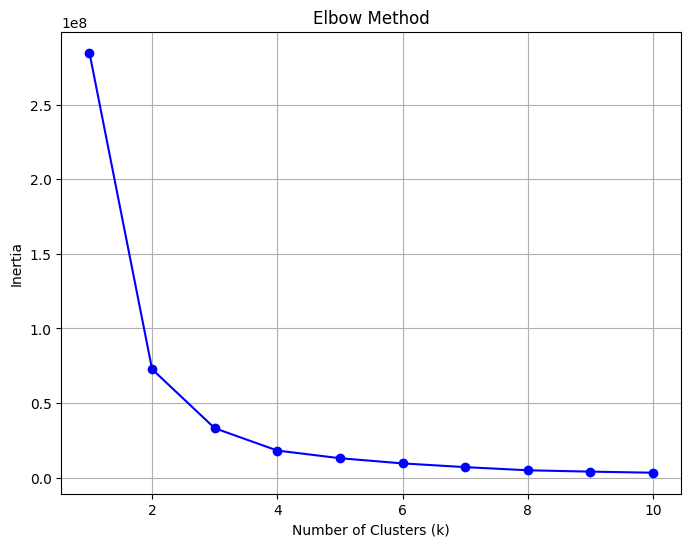

In [6]:
# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['mpg', 'Year_model', 'weight']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


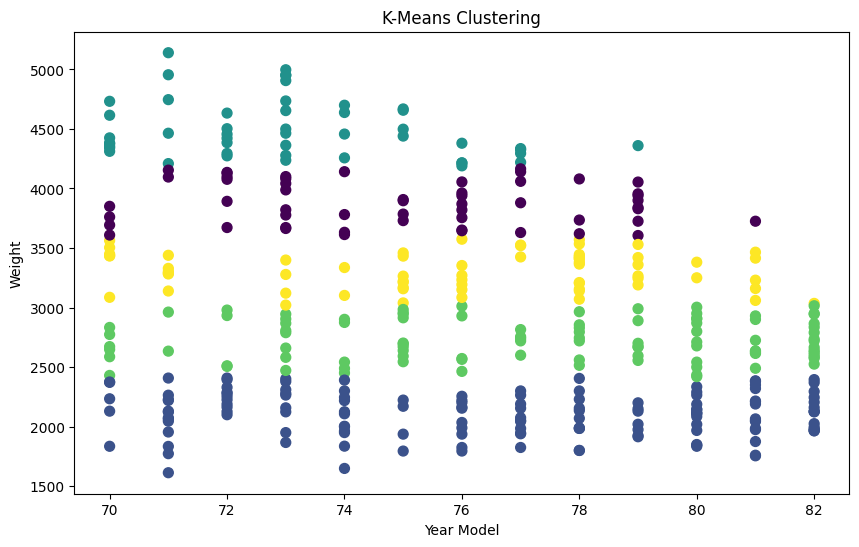

In [8]:
# Pilih atribut yang akan digunakan dalam K-Means Clustering
attributes = df[['mpg', 'Year_model', 'weight']]

# Membuat model K-Means Clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(attributes)

# Menambahkan kolom 'label' ke dataframe df
df['label'] = kmeans.labels_

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Year_model'], df['weight'], c=df['label'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Year Model')
plt.ylabel('Weight')
plt.show()

In [9]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.6382
Silhouette Score for k=3: 0.5939
Silhouette Score for k=4: 0.5923
Silhouette Score for k=5: 0.5687
Silhouette Score for k=6: 0.5466
Silhouette Score for k=7: 0.5232
Silhouette Score for k=8: 0.5564
Silhouette Score for k=9: 0.5507
Silhouette Score for k=10: 0.5423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.5031
Davies-Bouldin Index for k=3: 0.4951
Davies-Bouldin Index for k=4: 0.4844
Davies-Bouldin Index for k=5: 0.5177
Davies-Bouldin Index for k=6: 0.5345
Davies-Bouldin Index for k=7: 0.5407
Davies-Bouldin Index for k=8: 0.5063
Davies-Bouldin Index for k=9: 0.5077
Davies-Bouldin Index for k=10: 0.5073


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
